In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.decomposition import PCA
import matplotlib as mpl
%matplotlib inline

In [102]:
collated_df = pd.read_csv("Collated.csv")
kcfsi = pd.read_csv("KCFSI.csv")

In [103]:
collated_df.head()

,T10Y3MM,T10Y2YM,TB3MS,FEDFUNDS,T10YFFM,GS10,GS2
0,0.31,0.12,7.64,8.23,-0.02,8.21,8.09
1,0.47,0.10,7.74,8.24,0.23,8.47,8.37
2,0.42,-0.04,7.90,8.28,0.31,8.59,8.63
3,0.75,0.07,7.77,8.26,0.53,8.79,8.72
4,0.75,0.12,7.74,8.18,0.58,8.76,8.64


In [203]:
type(collated_df)

pandas.core.frame.DataFrame

In [197]:
print(np.std(collated_df['T10Y3MM']))
print(np.mean(collated_df['T10Y3MM']))

1.1135121484491337
1.8267664670658665


In [217]:
X_std = collated_df.sub(collated_df.mean())
TY10Y3MM = X_std['T10Y3MM']  /np.std(collated_df['T10Y3MM'])
T10Y2YM = X_std['T10Y2YM']  /np.std(collated_df['T10Y2YM'])
TB3MS = X_std['TB3MS']  /np.std(collated_df['TB3MS'])
FEDFUNDS = X_std['FEDFUNDS']  /np.std(collated_df['FEDFUNDS'])
T10YFFM = X_std['T10YFFM']  /np.std(collated_df['T10YFFM'])
GS10 = X_std['GS10']  /np.std(collated_df['GS10'])
GS2 = X_std['GS2']  /np.std(collated_df['GS2'])
df = pd.DataFrame({'GS2':GS2, 'GS10':GS10, 'T10YFMM':T10YFFM, 'FEDFUNDS':FEDFUNDS,
                  'TB3MS':TB3MS, 'T10Y2YM':T10Y2YM,'TY10Y3MM':TY10Y3MM})
df

,FEDFUNDS,GS10,GS2,T10Y2YM,T10YFMM,TB3MS,TY10Y3MM
0,2.155603,1.858102,1.949817,-1.269043,-1.378374,2.133935,-1.362146
1,2.159709,1.994363,2.067001,-1.291838,-1.176231,2.177690,-1.218457
2,2.176132,2.057253,2.175815,-1.451403,-1.111545,2.247698,-1.263360
3,2.167921,2.162069,2.213481,-1.326031,-0.933659,2.190816,-0.967000
4,2.135074,2.146346,2.180000,-1.269043,-0.893230,2.177690,-0.967000
5,2.180238,1.999604,2.058631,-1.257646,-1.208573,2.173314,-1.200496
6,2.122757,1.994363,1.979113,-1.052491,-1.103459,2.125184,-1.101709
7,2.114545,2.141106,1.937261,-0.619388,-0.860887,2.050800,-0.688602
8,2.143286,2.214477,1.945632,-0.482618,-0.804287,2.011421,-0.482048
9,2.106334,2.125383,1.861929,-0.448426,-0.868973,1.928286,-0.455106


In [227]:
pca = PCA(n_components=1)
X_std_pca = pca.fit(df)
X = X_std_pca.components_



In [238]:
X_std_pca_scaled = preprocessing.scale(X[0])
X_std_pca_scaled

array([ 0.94826771,  0.67537986,  0.88320745, -1.23749723, -1.10277059,
        0.94218603, -1.10877324])

In [240]:
np.std(X_std_pca_scaled)

0.9999999999999998

In [241]:
fun = X_std_pca_scaled[0] * collated_df['T10Y3MM']
fun1 =X_std_pca_scaled[1] * collated_df['T10Y2YM']
fun2 = X_std_pca_scaled[2] * collated_df['TB3MS']
fun3 = X_std_pca_scaled[3] * collated_df['FEDFUNDS']
fun4= X_std_pca_scaled[4] * collated_df['T10YFFM']
fun5 = X_std_pca_scaled[5] * collated_df['GS10']
fun6 = X_std_pca_scaled[6] * collated_df['GS2']

In [242]:
total = fun + fun1 + fun2 + fun3 + fun4 +fun5 + fun6
#final = preprocessing.scale(total)
np.std(final)

0.9999999999999999

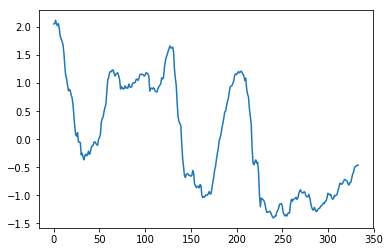

In [243]:
plt.plot(final)

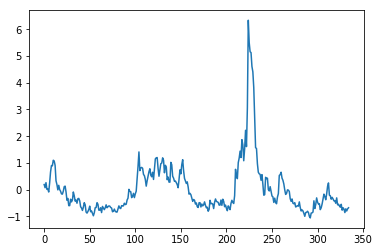

In [244]:
plt.plot(kcfsi)